# Linear regression homework with Yelp votes

## Introduction

This assignment uses a small subset of the data from Kaggle's [Yelp Business Rating Prediction](https://www.kaggle.com/c/yelp-recsys-2013) competition.

**Description of the data:**

- `yelp.json` is the original format of the file. `yelp.csv` contains the same data, in a more convenient format. Both of the files are in this repo, so there is no need to download the data from the Kaggle website.
- Each observation in this dataset is a review of a particular business by a particular user.
- The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.
- The "cool" column is the number of "cool" votes this review received from other Yelp users. All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.
- The "useful" and "funny" columns are similar to the "cool" column.

## Task 1

Read `yelp.csv` into a DataFrame.

In [2]:
import pandas as pd

fname = r'f:\Git_Repositories\DAT-DC-9\data\yelp.csv'
votes = pd.read_table(fname, sep=',')
votes.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


## Task 1 (Bonus)

Ignore the `yelp.csv` file, and construct this DataFrame yourself from `yelp.json`. This involves reading the data into Python, decoding the JSON, converting it to a DataFrame, and adding individual columns for each of the vote types.

In [3]:
# read the data from yelp.json into a list of rows
# each row is decoded into a dictionary using using json.loads()

import json

fname_json = r'f:\Git_Repositories\DAT-DC-9\data\yelp.json'

with open(fname_json, mode='rU') as json_data:
    ylist = [json.loads(row) for row in json_data]

In [4]:
# show the first review
ylist[0]

{'business_id': '9yKzy9PApeiPPOUJEtnvkg',
 'date': '2011-01-26',
 'review_id': 'fWKvX83p0-ka4JS3dc6E5A',
 'stars': 5,
 'text': 'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway

In [5]:
# convert the list of dictionaries to a DataFrame
yjson_df = pd.DataFrame(ylist)
yjson_df.head(1) #Check to make sure everything seems correct.

,business_id,date,review_id,stars,text,type,user_id,votes
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,"{'funny': 0, 'useful': 5, 'cool': 2}"


In [6]:
# add DataFrame columns for cool, useful, and funny

# Since the current value for "votes" is a dictionary, you can reference the "key" when creating the new column.
yjson_df['funny'] = [row['votes']['funny'] for row in ylist]
yjson_df['cool'] = [row['votes']['cool'] for row in ylist]
yjson_df['useful'] = [row['votes']['useful'] for row in ylist]

yjson_df.head(1) #Check to make sure everything is correct.

,business_id,date,review_id,stars,text,type,user_id,votes,funny,cool,useful
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,"{'funny': 0, 'useful': 5, 'cool': 2}",0,2,5


In [7]:
# drop the votes column

# axis=1 indicates the column and inplace=True keeps the change
yjson_df.drop('votes',axis=1,inplace=True)

yjson_df.head(1) # Check to make sure it dropped correctly.

,business_id,date,review_id,stars,text,type,user_id,funny,cool,useful
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,0,2,5


## Task 2

Explore the relationship between each of the vote types (cool/useful/funny) and the number of stars.

           cool    useful     funny
stars                              
1      0.576769  1.604806  1.056075
2      0.719525  1.563107  0.875944
3      0.788501  1.306639  0.694730
4      0.954623  1.395916  0.670448
5      0.944261  1.381780  0.608631


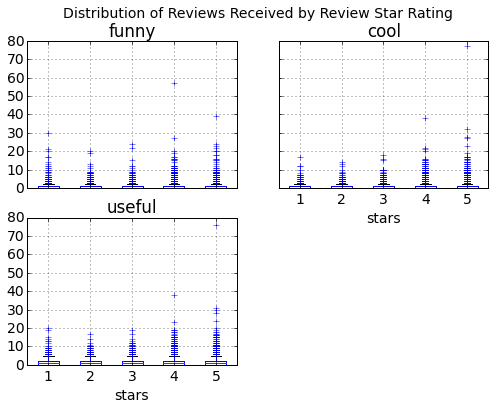

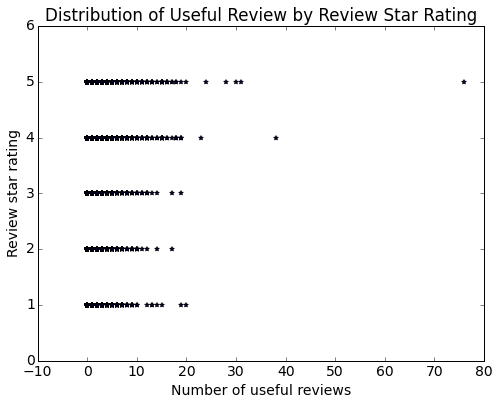

In [14]:
# treat stars as a categorical variable and look for differences between groups
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14


print(votes.groupby('stars').mean()) # Do a simple check of the means, grouped by "stars," to see if you can see any possible
                                     # relationships.

#Let's look at the number of all reviews (split by review) by star rating.
votes.boxplot(column=['funny','cool','useful'],by='stars')
plt.suptitle("Distribution of Reviews Received by Review Star Rating")


# Use a scatter plot to essentially flip the former figure on its side to get a possibly clearer picture.
votes.plot(kind='scatter',x='useful',y='stars',marker='*',title="Distribution of Useful Review by Review Star Rating")
plt.xlabel('Number of useful reviews')
plt.ylabel('Review star rating')


In [15]:
# correlation matrix
import numpy as np


# The below computes and shows the correlation matrix between each of the variables to show how they relate to each other.
# For example, the matrix shows that a "funny" review leads to a more negative star rating.
print(votes[['stars','funny','cool','useful']].corr())

           stars     funny      cool    useful
stars   1.000000 -0.061306  0.052555 -0.023479
funny  -0.061306  1.000000  0.764342  0.723406
cool    0.052555  0.764342  1.000000  0.887102
useful -0.023479  0.723406  0.887102  1.000000


## Task 3

Define cool/useful/funny as the features, and stars as the response.

In [21]:
feature_cols = ['funny','cool','useful']
X = votes[feature_cols]
y = votes.stars

## Task 4

Fit a linear regression model and interpret the coefficients. Do the coefficients make intuitive sense to you? Explore the Yelp website to see if you detect similar trends.

In [17]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

print(linreg.intercept_)
print(linreg.coef_)

# These coefficients make intuitive sense to me.
# (1) 'funny' being inversely related to stars seems expected as a 'funny' review is likely to be an over-the-top criticism 
#     of one's experience.
# (2) 'cool' being directly related to stars also seems expected as 'cool' is more positive in nature and likely someone 
#      agreeing with that positive review.
# (3) I would have expected 'useful' to be closer to 0 as I feel that people would rate both positive and negative reviews
#     as a 'useful' review on an equal basis. However, being inversely related, more people indicate a negative review as being
#     useful as it probably helps them to avoid the restaurant.

3.83989479278
[-0.13567449  0.27435947 -0.14745239]


## Task 5

Evaluate the model by splitting it into training and testing sets and computing the RMSE. Does the RMSE make intuitive sense to you?

In [18]:
import numpy as np
from sklearn import metrics
from sklearn.cross_validation import train_test_split

In [23]:
# define a function that accepts a list of features and returns testing RMSE
def train_test_rmse(X,y):
    # Random_state = 1 helps us to test our model by helping to change our training sample each time.
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [24]:
# calculate RMSE with all three features
train_test_rmse(X,y)

1.1842905282165896

## Task 6

Try removing some of the features and see if the RMSE improves.

In [29]:
feat_test_cols = ['funny','cool']
X_prac = votes[feat_test_cols]
train_test_rmse(X_prac,y)

# I tested all of the other combinations one 1 and 2 features and none of them resulted in a RMSE less than the original
# with all three features.

1.1942673256493725

## Task 7 (Bonus)

Think of some new features you could create from the existing data that might be predictive of the response. Figure out how to create those features in Pandas, add them to your model, and see if the RMSE improves.

In [30]:
# new feature: review length (number of characters)
votes['rev_len'] = votes['text'].str.len()

In [31]:
# new features: whether or not the review contains 'love' or 'hate'

# I use astype() at the end to turn them into 1s and 0s.
votes['love'] = votes.text.str.contains('love',case=False).astype(int)
votes['hate'] = votes.text.str.contains('hate',case=False).astype(int)
votes.head(1) # Check to make sure that the above worked.

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,rev_len,love,hate
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,895,0,0


In [32]:
# add new features to the model and calculate RMSE
new_feature_cols = ['cool','useful','funny','rev_len','love','hate']
X_new = votes[new_feature_cols]
y_new = votes.stars

train_test_rmse(X_new,y_new)

1.1584355206008665

## Task 8 (Bonus)

Compare your best RMSE on the testing set with the RMSE for the "null model", which is the model that ignores all features and simply predicts the mean response value in the testing set.

In [45]:
# split the data (outside of the function)
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, random_state=1)

In [46]:
# create a NumPy array with the same shape as y_test

# Initialize this array by making an array of zeroes of type float.
y_null = np.zeros_like(y_test, dtype = float)

y_null #Check to see the above worked.

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [47]:
# fill the array with the mean of y_test
y_null.fill(y_test.mean())

y_null #Check to see the above worked.

array([ 3.7776,  3.7776,  3.7776, ...,  3.7776,  3.7776,  3.7776])

In [48]:
# calculate null RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_null)))

1.21232761249


## Task 9 (Bonus)

Instead of treating this as a regression problem, treat it as a classification problem and see what testing accuracy you can achieve with KNN.

In [49]:
# import and instantiate KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=25) # Set the number of neighbors to 25 so that our model isn't overly complex (close to 1)

In [50]:
# classification models will automatically treat the response value (1/2/3/4/5) as unordered categories

knn.fit(X_new, y_new)
y_pred_knn = knn.predict(X_new)
print(metrics.accuracy_score(y_new, y_pred_knn))

0.4186


## Task 10 (Bonus)

Figure out how to use linear regression for classification, and compare its classification accuracy with KNN's accuracy.

In [51]:
# use linear regression to make continuous predictions
linreg = LinearRegression()
linreg.fit(X_train, y_train) # Use the previously calculated training data.
y_pred = linreg.predict(X_test)

In [52]:
# round its predictions to the nearest integer
y_pred_round = y_pred.round(0).astype(int)

print(y_pred) #Compare the two predicted outcome results to make sure the rounding worked.
print(y_pred_round)

[ 3.54534745  4.09243277  3.70827769 ...,  3.75179996  4.18935337
  2.81369331]
[4 4 4 ..., 4 4 3]


In [53]:
# calculate classification accuracy of the rounded predictions
print(metrics.accuracy_score(y_test, y_pred_round))

0.3368


In [ ]:
# KNN produced the superior accuracy score for prediction.